# Timeseries analysis

This notebook is used to explore the time series data of the parking steinen. Here we tried to see the influence of Covid-19.

In [1]:
# load dependencies
import matplotlib.pyplot as plt
import statsmodels
import pandas as pd
import numpy as np
from clean_data import clean_data
from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
# historic dataset
path = "../data/raw/"
file = "100014.csv"
data = clean_data(path, file)

In [3]:
# we start to analyse the garage steinen
df_steinen = data[data['id2'] == 'steinen'].copy()

In [4]:
df_steinen['published'] = pd.to_datetime(df_steinen['published'], utc=True)
print(df_steinen.dtypes)
df_steinen['year'] = df_steinen['published']
df_steinen['month'] = df_steinen['published']
df_steinen['day'] = df_steinen['published']
df_steinen['weekday'] = df_steinen['published']

published    datetime64[ns, UTC]
free                       int32
id2                       object
total                      int64
latitude                 float64
longitude                float64
dtype: object


In [5]:
df_steinen['year']=df_steinen['year'].apply(lambda x: x.year)
df_steinen['month']=df_steinen['month'].apply(lambda x: x.month)
df_steinen['day']=df_steinen['day'].apply(lambda x: x.day)
df_steinen['weekday']=df_steinen['weekday'].apply(lambda x: x.weekday())

The plot below shows the number of available parking spaces.

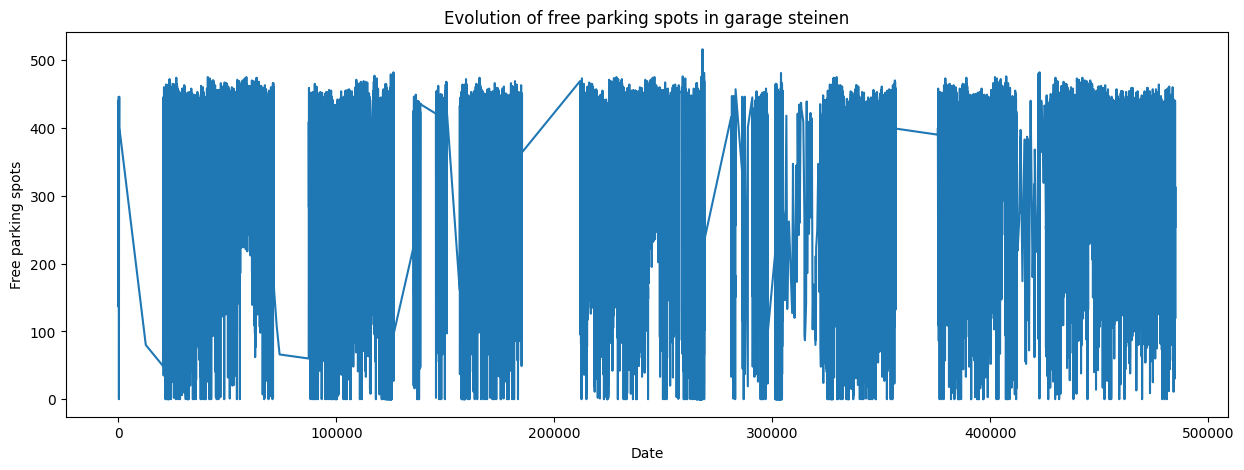

In [6]:
plt.figure(figsize=(15, 5))
plt.plot(df_steinen.index, df_steinen['free'])
plt.title('Evolution of free parking spots in garage steinen')
plt.xlabel('Date')
plt.ylabel('Free parking spots')
plt.show()

The plot above shows the gaps in the data. We can see, that there are a lot of moments that the data couldn't be collected. This problem will be handled in a future step.

The plots below show the number of available parking spaces for each day of the week and for each month (the mean). 

mean of free spots per year:  year
2019    273.153447
2020    326.780953
2021    307.038409
2022    288.271171
Name: free, dtype: float64


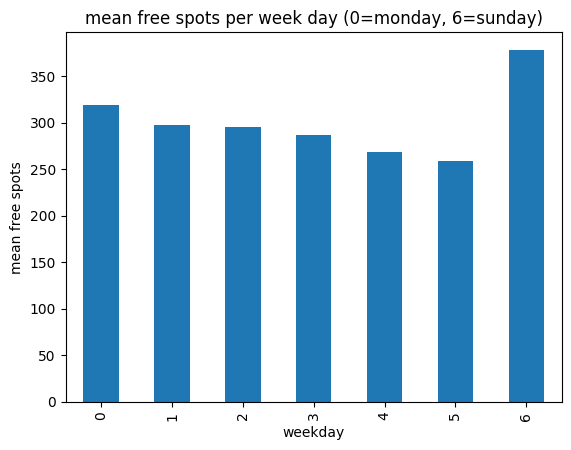

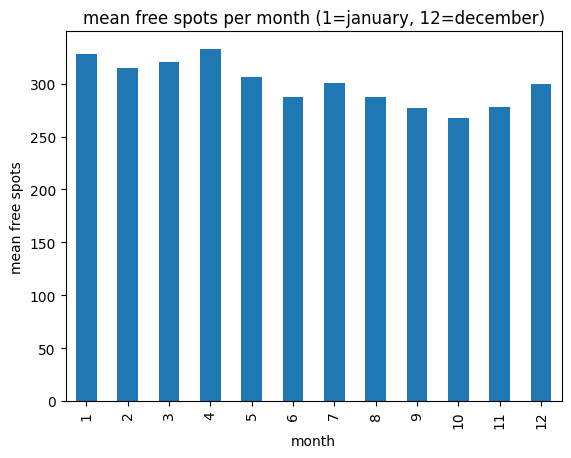

In [7]:
print('mean of free spots per year: ', df_steinen.groupby('year').mean(['free'])['free'])
df_steinen.groupby('weekday').mean(['free'])['free'].plot(kind='bar')
plt.title('mean free spots per week day (0=monday, 6=sunday)')
plt.ylabel('mean free spots')
plt.xlabel('weekday')
plt.show()

df_steinen.groupby('month').mean(['free'])['free'].plot(kind='bar')
plt.title('mean free spots per month (1=january, 12=december)')
plt.ylabel('mean free spots')
plt.xlabel('month')
plt.show()

We can't see a clear pattern in the data for the months. But we can see that the number of available parking spaces is higher on sundays. That was expected. 

Because the data was collected during the pandemic, we analyse in the next plots the influence of Covid-19.

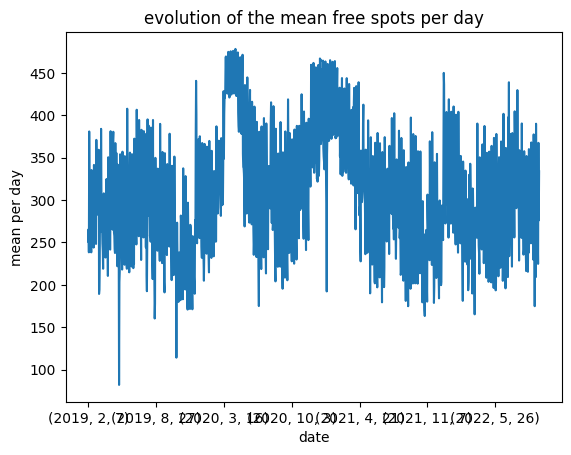

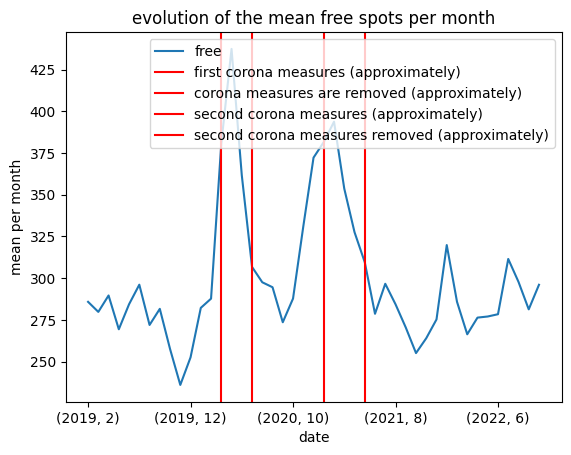

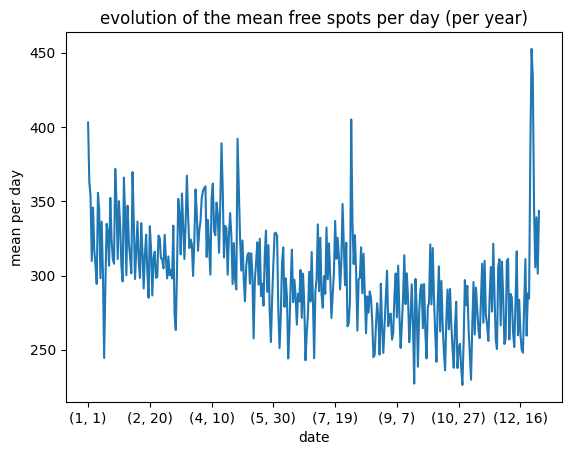

In [9]:
df_steinen.groupby(['year', 'month', 'day']).mean('free')['free'].plot()
plt.title('evolution of the mean free spots per day')
plt.ylabel('mean per day')
plt.xlabel('date')
plt.show()

df_steinen.groupby(['year', 'month']).mean('free')['free'].plot()
plt.title('evolution of the mean free spots per month')
plt.ylabel('mean per month')
plt.xlabel('date')
plt.axvline(13, color='red', label='first corona measures (approximately)')
plt.axvline(16, color='red', label='corona measures are removed (approximately)')
plt.axvline(23, color='red', label='second corona measures (approximately)')
plt.axvline(27, color='red', label='second corona measures removed (approximately)')
plt.legend()
plt.show()

df_steinen.groupby(['month', 'day']).mean('free')['free'].plot()
plt.title('evolution of the mean free spots per day (per year)')
plt.ylabel('mean per day')
plt.xlabel('date')
plt.show()

The first two plots show the same data, but on a different resolution. In the second plot we plotted the arrival and removal of the corona measures with red lines. We can see that the number of free parking spaces is higher as the first corona measures were introduced. When the measures were removed, the number of free parking spaces was lower. The same goes for the second corona measures. This isn't a statistical prove, but we can say that it's possible that the corona measures have an influence on the number of free parking spaces.\
The last plot shows the mean free parking spots per day and averages it over the three years. This means that we this would be a mean year.
 